## Detección de outliers por feature = CREATININE y  por revisión

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Cargar matrices de progresores y no progesores

matriz_progresores = np.load('../../ddbb/Matriz_progresores.npy') 
matriz_no_progresores = np.load('../../ddbb/Matriz_no_progresores.npy') 
print(matriz_progresores.shape)
print(matriz_no_progresores.shape)

(132, 22, 22)
(1515, 33, 22)


In [6]:
revisiones_no_prog = matriz_no_progresores.shape[1]
print (revisiones_no_prog)

33


In [7]:
revisiones_prog = matriz_progresores.shape[1]
print (revisiones_prog)

22


(0.0, 5.0)

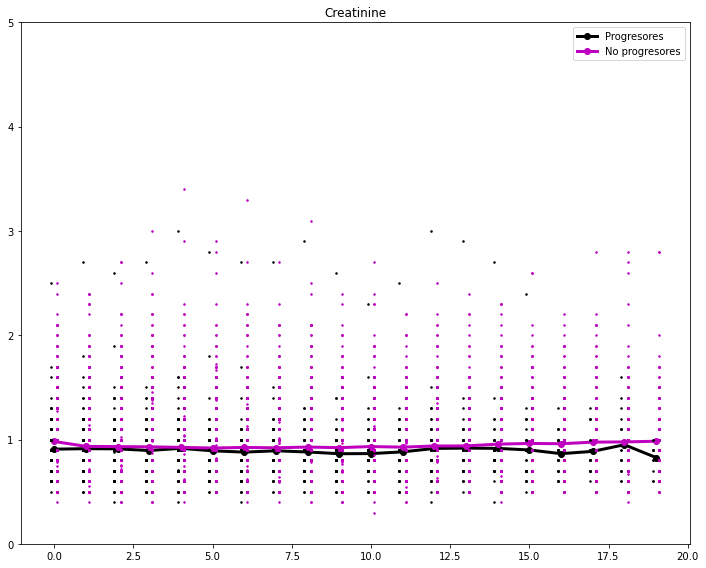

In [10]:
feature_names = ['Age','Weight','Size','IMC','Creatinine','Cystatin','HDL','LDL','Triglyciredes','GOT','GPT','GGT','Albuminuria','Ferritin','HOMA','Insulin','Blood_Glucose','Glycated-HB','PCR','Vitamin-D','TAS','TAD','Date']
plt.figure(figsize = (10,8))

i = feature_names.index('Creatinine')

plt.plot(np.nanmean(matriz_progresores[:,:20,i],axis = 0),'k-o',linewidth = 3,label = 'Progresores')

plt.plot(np.nanmean(matriz_no_progresores[:,:20,i],axis = 0),'m-o',linewidth = 3,label = 'No progresores') 
#plt.plot(matriz_no_progresores[:,:20,i],'m',linewidth = .33) 
plt.title(feature_names[i])
plt.legend()

for aa in range(20):
    x = np.zeros(matriz_progresores[:,aa,i].shape)+aa-0.1
    x_n = np.zeros(matriz_no_progresores[:,aa,i].shape) +aa+0.1
    plt.plot(x,matriz_progresores[:,aa,i],'.',markersize =3,color = 'k')
    plt.plot(x_n,matriz_no_progresores[:,aa,i],'.',markersize =3,color = 'm')

plt.tight_layout()

plt.ylim(0,5)

## PROGRESORES

In [5]:
# Creamos matriz de índices con todo true y mismas dimensiones que matriz progresores

idx_prog = np.zeros(matriz_progresores.shape, dtype=bool)
idx_prog[:,:,:] = True

#En este notebook siempre trabajamos con idx size
idx_feature = 4

# Poner a false las posiciones de la matriz progresores que tengan nan
for rev in range(revisiones_prog):
    
    idxn = np.isnan(matriz_progresores[:,rev,idx_feature]) #vector con True donde hay NAN
    #idxoutl = (matriz_no_progresores[:,1,16] < 200) & (matriz_no_progresores[:,1,16] > 50)
    idx_prog[:,rev,idx_feature] = ~idxn

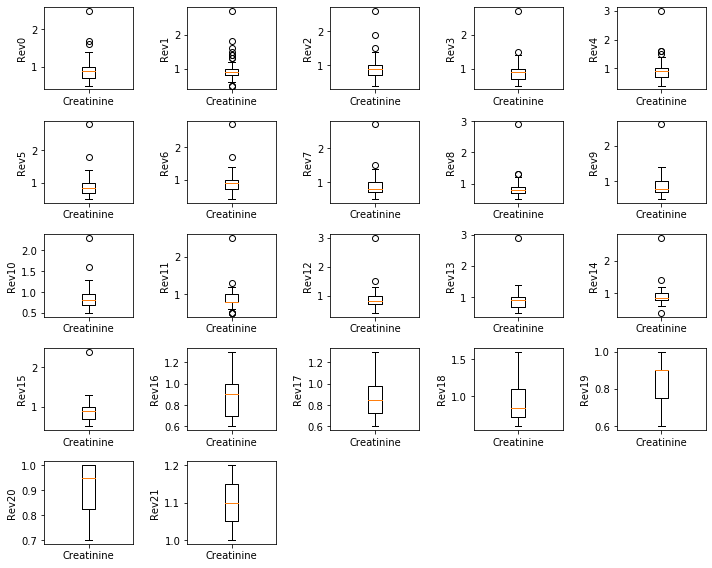

In [6]:
#Pintar boxplot para cada revision
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,8))

for i in range(revisiones_prog):
    plt.subplot(5,5,i+1)
    plt.boxplot(matriz_progresores[idx_prog[:,i,idx_feature],i,idx_feature])
    plt.xticks([1],['Creatinine'])
    plt.ylabel('Rev'+str(i))
    #plt.ylim(100,200)

plt.tight_layout()

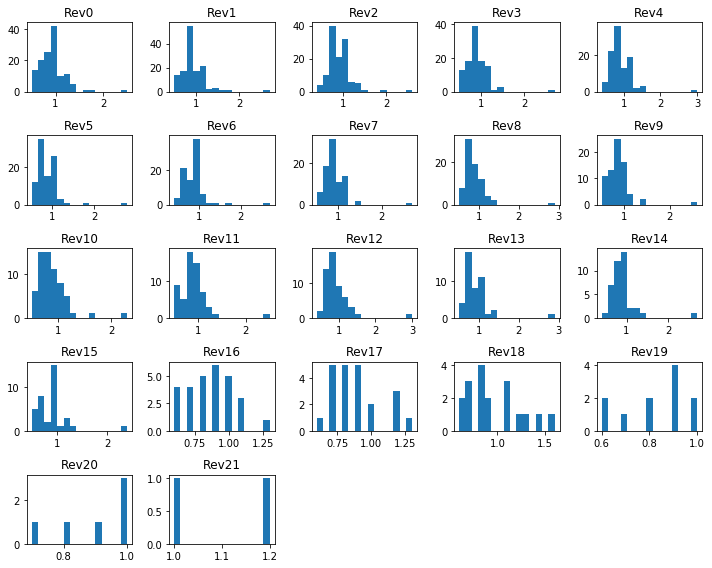

In [7]:
plt.figure(figsize = (10,8))

for i in range(revisiones_prog):
    plt.subplot(5,5,i+1)
    plt.hist(matriz_progresores[idx_prog[:,i,idx_feature],i,idx_feature],bins = 15)
    plt.title('Rev'+str(i))
    
    #plt.xlim(90,200)
plt.tight_layout()

## NO PROGRESORES

In [8]:
# Creamos matriz de índices con todo true y mismas dimensiones que matriz progresores

idx_no_prog = np.zeros(matriz_no_progresores.shape, dtype=bool)
idx_no_prog[:,:,:] = True

#En este notebook siempre trabajamos con idx size
idx_feature = 4

# Poner a false las posiciones de la matriz progresores que tengan nan
for rev in range(revisiones_no_prog):
    
    idxn_1 = np.isnan(matriz_no_progresores[:,rev,idx_feature]) #vector con True donde hay NAN
    #idxoutl = (matriz_no_progresores[:,1,16] < 200) & (matriz_no_progresores[:,1,16] > 50)
    idx_no_prog[:,rev,idx_feature] = ~idxn_1

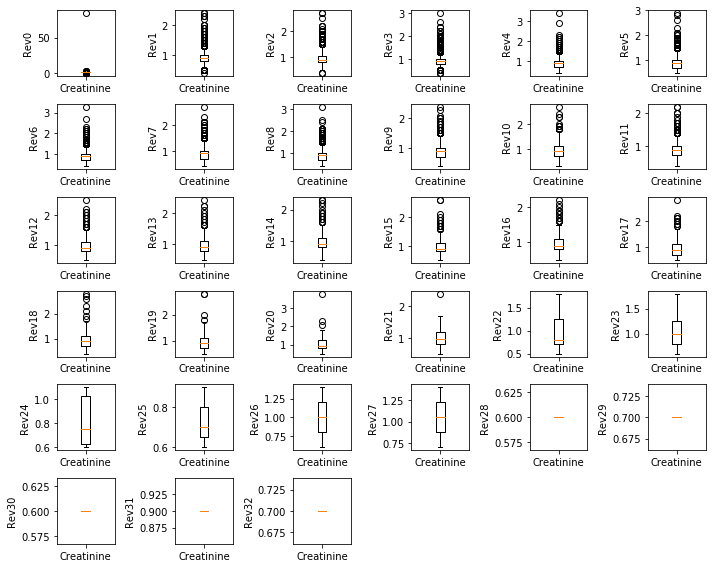

In [9]:
#Pintar boxplot para cada revision
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,8))

for i in range(revisiones_no_prog):
    plt.subplot(6,6,i+1)
    plt.boxplot(matriz_no_progresores[idx_no_prog[:,i,idx_feature],i,idx_feature])
    plt.xticks([1],['Creatinine'])
    plt.ylabel('Rev'+ str(i))
    #plt.ylim(100,200)

plt.tight_layout()

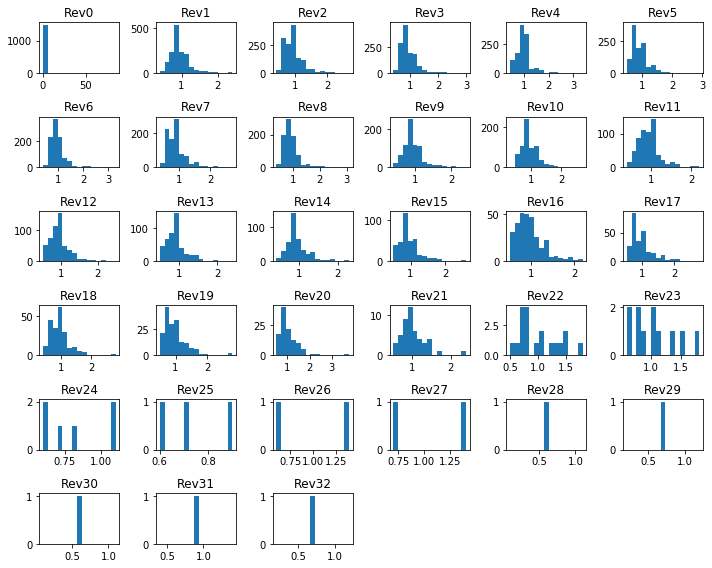

In [10]:
plt.figure(figsize = (10,8))

for i in range(revisiones_no_prog):
    plt.subplot(6,6,i+1)
    plt.hist(matriz_no_progresores[idx_no_prog[:,i,idx_feature],i,idx_feature],bins = 15)
    plt.title('Rev'+str(i))
    
    #plt.xlim(90,200)
plt.tight_layout()

### NUMERO DE PACIENTES POR REVISION

#### NO PROGRESORES

In [11]:
import math
nan = float('nan')
for k in range(matriz_no_progresores.shape[1]):
    l = [matriz_no_progresores[:,k,4]]
    l = [[j for j in i if not math.isnan(j)] for i in l]
    l = np.array(l)
    print(len(l[0,:]))

1494
1508
1379
1273
1153
1067
983
909
824
750
685
603
542
460
405
355
303
255
219
170
111
48
19
11
6
3
2
2
1
1
1
1
1


#### PROGRESORES

In [12]:
import math
nan = float('nan')
for k in range(matriz_progresores.shape[1]):
    l = [matriz_progresores[:,k,4]]
    l = [[j for j in i if not math.isnan(j)] for i in l]
    l = np.array(l)
    print(len(l[0,:]))

130
132
121
108
101
94
87
85
77
72
63
59
55
45
40
36
28
22
18
11
6
2
